In [2]:
%cd C:\SaiVinay\GitHub\ir_srgan_otsr\src
import torch
import torch.nn as nn
from src.RRDBNet_arch import RRDBNet

netG = RRDBNet(in_nc=3, out_nc=3, nf=64, nb=23, gc=32)

#load the otsr model
path = r'C:\SaiVinay\GitHub\ir_srgan_otsr\gan_project\OTSR_dev\pretrained_model\DF2K_OTSR_G.pth'
netG.load_state_dict(torch.load(path), strict=True)

C:\SaiVinay\GitHub\ir_srgan_otsr\src


<All keys matched successfully>

In [8]:
lr_img_path = r"C:\SaiVinay\Dataset\SRIR Data\Train\32.jpg"
img_name = lr_img_path[lr_img_path.rfind("\\")+1:]
img_name

'32.jpg'

Shape of the input image:  torch.Size([3, 518, 698])
Input image: 


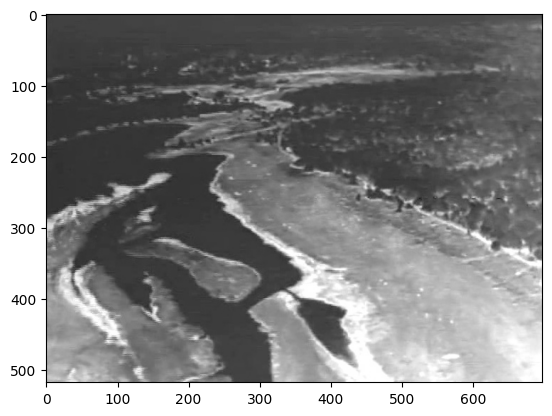

Shape of the Super Resolved image:  torch.Size([1, 3, 2072, 2792])


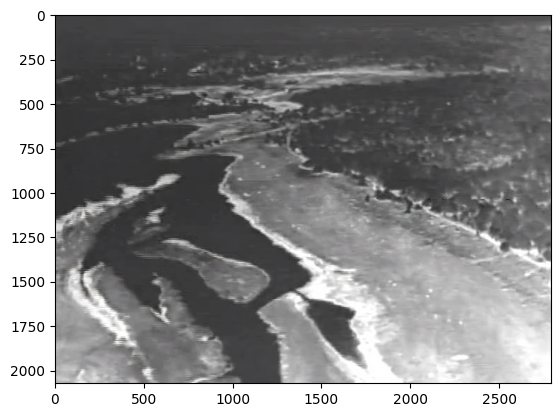

In [10]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import cv2

# Image saving path
save_path = r"C:\SaiVinay\GitHub\ir_srgan_otsr\src\val_imgs"

lr_img_path = r"C:\SaiVinay\Dataset\SRIR Data\Train\32.jpg"
img_name = lr_img_path[lr_img_path.rfind("\\")+1:]
lr_img = Image.open(lr_img_path).convert("RGB")
# plt.imshow(lr_img)
# plt.show()
#resize the image to 32x32
pre_process_lr = transforms.Compose([#transforms.Resize(32),
                                     #transforms.RandomCrop(32),
                                    transforms.ToTensor()])

lr_img = pre_process_lr(lr_img)
# lr_img = lr_img.permute(1, 2, 0)
print("Shape of the input image: ",lr_img.shape)

# show the image
import matplotlib.pyplot as plt
lr_img = lr_img.permute(1, 2, 0)
print("Input image: ")
plt.imshow(lr_img)
plt.show()

import torch
with torch.no_grad():
    # print(lr_img.shape)
    lr_img = lr_img.permute(2, 0, 1)
    # print(lr_img.shape)
    sr_img = netG(lr_img.unsqueeze(0)) # c, h, w
    print("Shape of the Super Resolved image: ",sr_img.shape)
    sr_img = sr_img.squeeze(0).permute(1, 2, 0).clamp(0, 1).numpy()

    ing_file_name = os.path.join(save_path,img_name)
    plt.imsave(ing_file_name, sr_img)
    # cv2.imwrite(ing_file_name, cv2.cvtColor(sr_img, cv2.COLOR_RGB2BGR) )
    # sr_img.save(os.path.join(save_path,img_name))
    # print(sr_img.shape)
    plt.imshow(sr_img)
    plt.show()

In [14]:
# cv2.imwrite(ing_file_name, cv2.cvtColor(sr_img, cv2.COLOR_RGB2GRAY) )
plt.imsave(ing_file_name, sr_img)

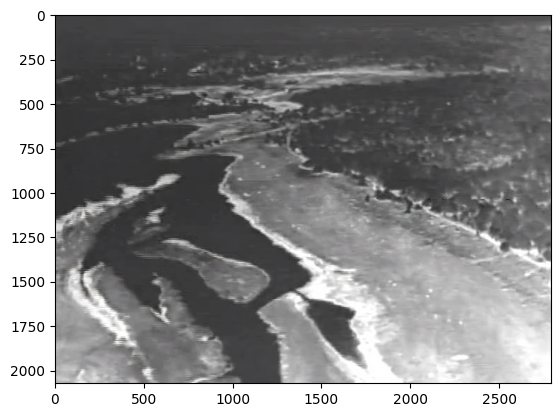

In [13]:
plt.imshow(sr_img)
plt.show()

Shape of the input image:  torch.Size([3, 512, 640])
Input image: 


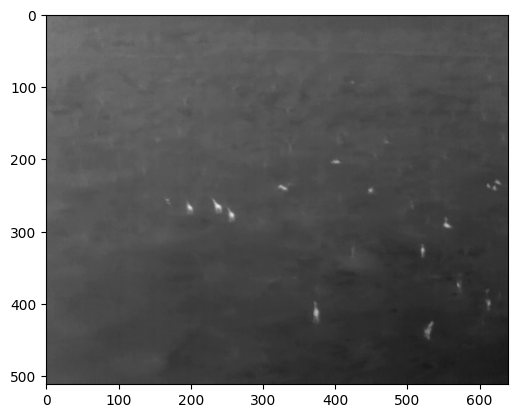

Shape of the Super Resolved image:  torch.Size([1, 3, 2048, 2560])


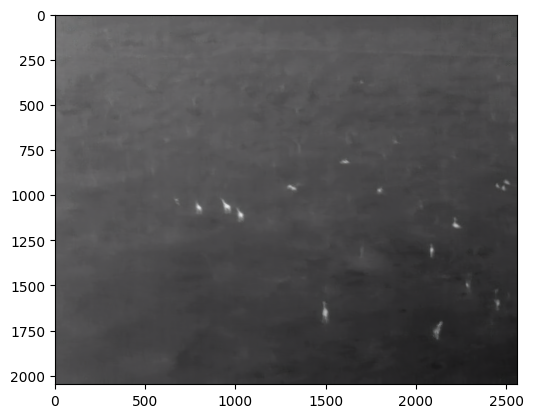

In [17]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import cv2

# Image saving path
save_path = r"C:\SaiVinay\GitHub\ir_srgan_otsr\src\val_imgs"

lr_img_path = r"C:\SaiVinay\Dataset\SRIR Data\Train\13190.jpg"
img_name = lr_img_path[lr_img_path.rfind("\\")+1:]
lr_img = Image.open(lr_img_path).convert("RGB")
# plt.imshow(lr_img)
# plt.show()
#resize the image to 32x32
pre_process_lr = transforms.Compose([#transforms.Resize(32),
                                     #transforms.RandomCrop(32),
                                    transforms.ToTensor()])

lr_img = pre_process_lr(lr_img)
# lr_img = lr_img.permute(1, 2, 0)
print("Shape of the input image: ",lr_img.shape)

# show the image
import matplotlib.pyplot as plt
lr_img = lr_img.permute(1, 2, 0)
print("Input image: ")
plt.imshow(lr_img)
plt.show()

import torch
with torch.no_grad():
    # print(lr_img.shape)
    lr_img = lr_img.permute(2, 0, 1)
    # print(lr_img.shape)
    sr_img = netG(lr_img.unsqueeze(0)) # c, h, w
    print("Shape of the Super Resolved image: ",sr_img.shape)
    sr_img = sr_img.squeeze(0).permute(1, 2, 0).clamp(0, 1).numpy()

    ing_file_name = os.path.join(save_path,img_name)
    plt.imsave(ing_file_name, sr_img)
    # cv2.imwrite(ing_file_name, cv2.cvtColor(sr_img, cv2.COLOR_RGB2BGR) )
    # sr_img.save(os.path.join(save_path,img_name))
    # print(sr_img.shape)
    plt.imshow(sr_img)
    plt.show()

### IR Image SR using Edge loss


In [ ]:
def load_generation(path):
    

In [20]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

lr_img_path = r"C:\SaiVinay\Dataset\SRIR Data\Train\13190.jpg"
save_path = r"C:\SaiVinay\GitHub\ir_srgan_otsr\src_ir_with_edgeloss\val_imgs"

def ir_srgan(img_path, save_path, netG):
    # Image saving path
    img_name = img_path[img_path.rfind("\\")+1:]
    lr_img = Image.open(img_path)
    #resize the image to 32x32
    pre_process_lr = transforms.Compose([transforms.ToTensor()])

    lr_img = pre_process_lr(lr_img)
    print("Shape of the input image: ",lr_img.shape)

    # show the image
    import matplotlib.pyplot as plt
    lr_img = lr_img.permute(1, 2, 0)
    print("Input image: ")
    plt.imshow(lr_img)
    plt.show()

    import torch
    with torch.no_grad():
        lr_img = lr_img.permute(2, 0, 1)
        sr_img = netG(lr_img.unsqueeze(0)) # c, h, w
        print("Shape of the Super Resolved image: ",sr_img.shape)
        sr_img = sr_img.squeeze(0).permute(1, 2, 0).clamp(0, 1).numpy()
        ing_file_name = os.path.join(save_path,img_name)
        sr_img = np.squeeze(sr_img)
        plt.imsave(ing_file_name, sr_img, cmap='gray')
        plt.imshow(sr_img)
        plt.show()

In [17]:
%cd C:\SaiVinay\GitHub\ir_srgan_otsr\src_ir_with_edgeloss
import torch
import torch.nn as nn
from src_ir_with_edgeloss.RRDBNet_arch import RRDBNet

ir_edge_netG = RRDBNet(in_nc=1, out_nc=1, nf=64, nb=23, gc=32)

#load the otsr model
path = r'C:\SaiVinay\GitHub\ir_srgan_otsr\src_ir_with_edgeloss\trained_models_edgeloss5e\40138_G.pth'
ir_edge_netG.load_state_dict(torch.load(path), strict=True)

C:\SaiVinay\GitHub\ir_srgan_otsr\src_ir_with_edgeloss


<All keys matched successfully>

  0%|          | 0/10 [00:00<?, ?it/s]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


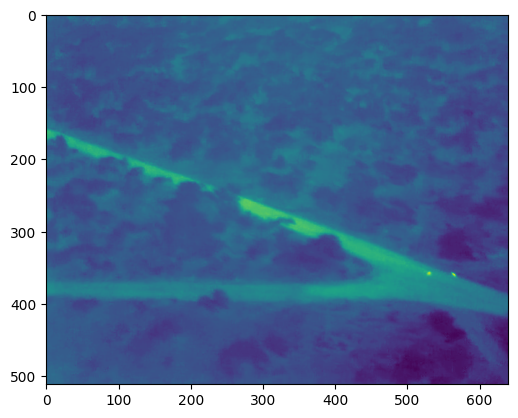

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


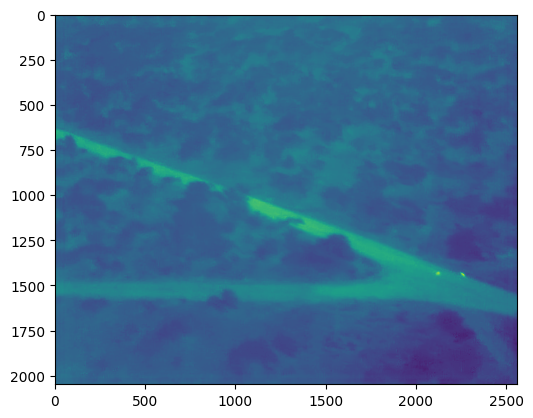

 10%|█         | 1/10 [00:37<05:38, 37.62s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


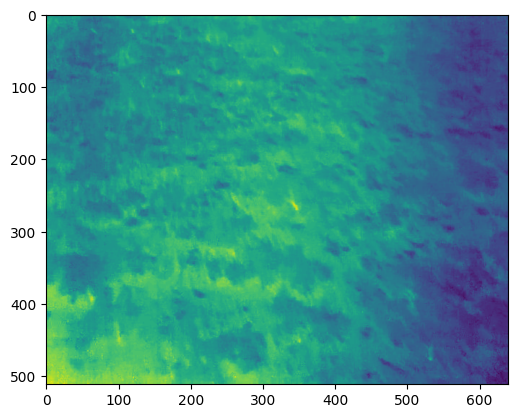

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


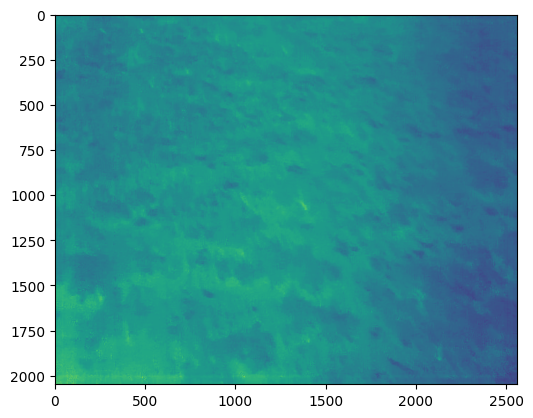

 20%|██        | 2/10 [01:12<04:47, 35.97s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


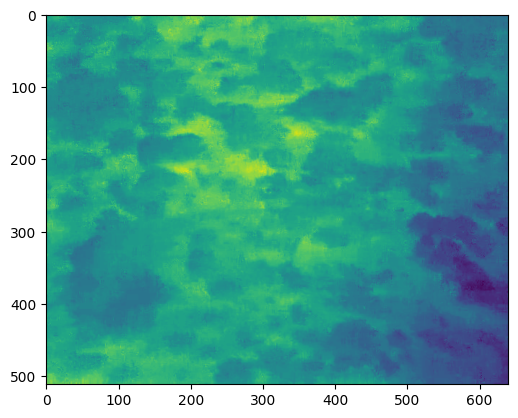

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


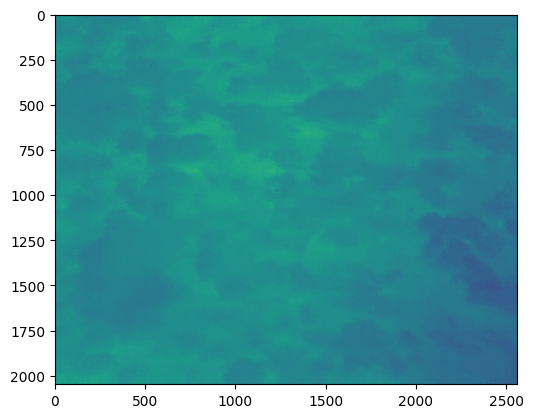

 30%|███       | 3/10 [01:46<04:04, 34.99s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


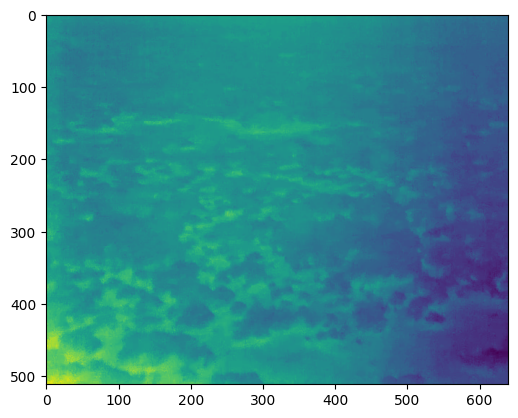

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


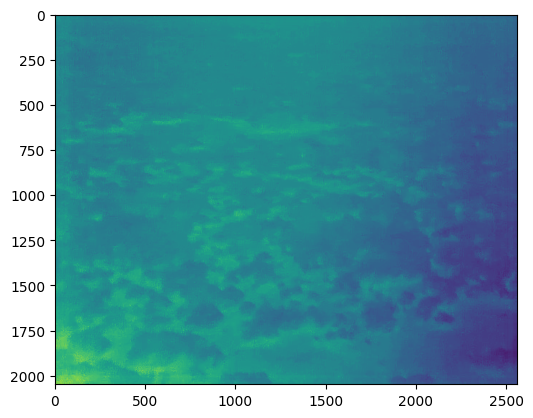

 40%|████      | 4/10 [02:20<03:29, 34.88s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


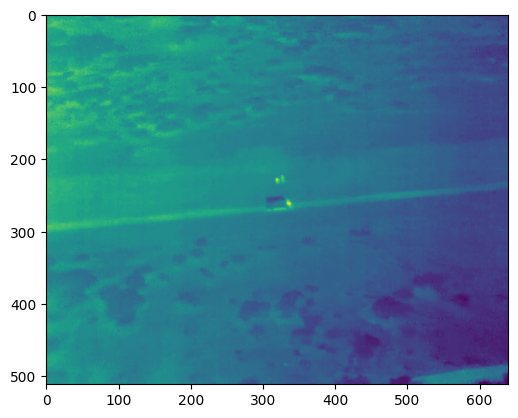

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


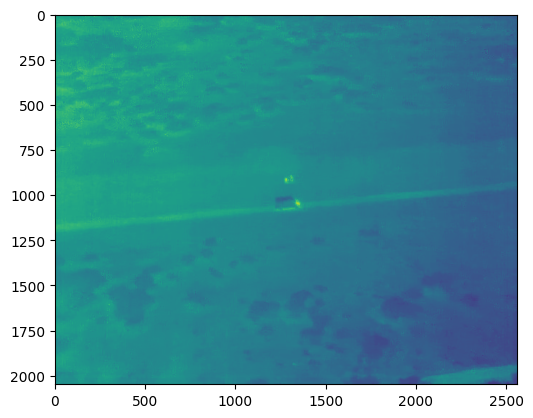

 50%|█████     | 5/10 [02:55<02:53, 34.71s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


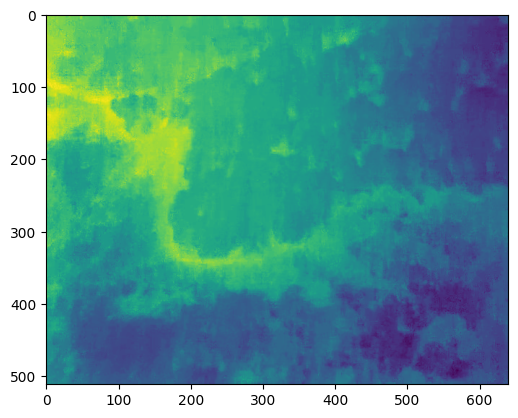

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


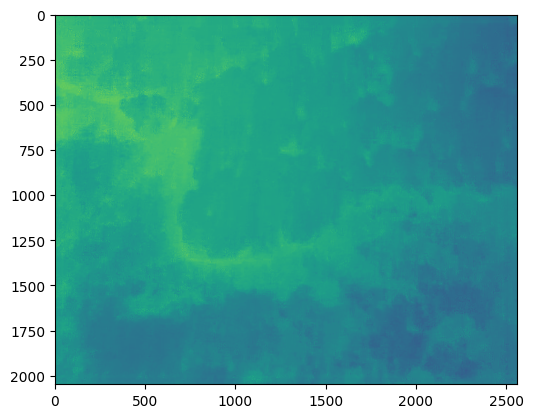

 60%|██████    | 6/10 [03:30<02:19, 34.80s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


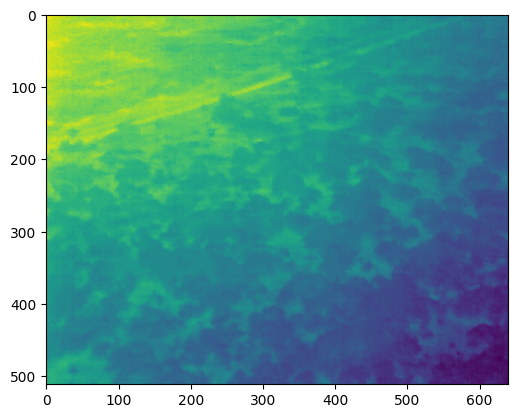

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


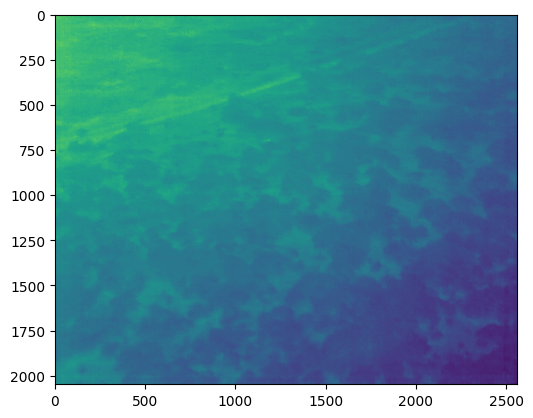

 70%|███████   | 7/10 [04:05<01:44, 34.91s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


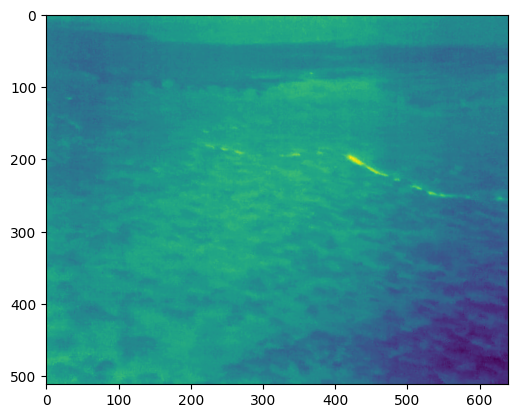

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


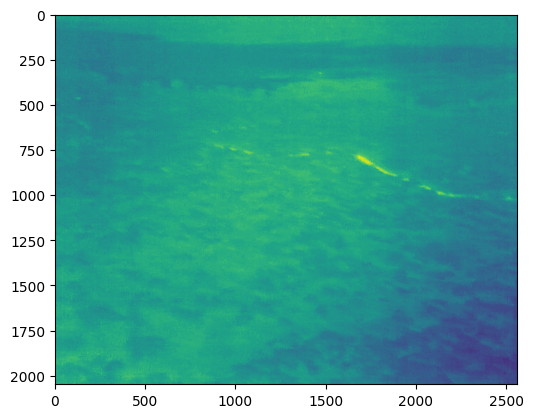

 80%|████████  | 8/10 [04:43<01:11, 35.89s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


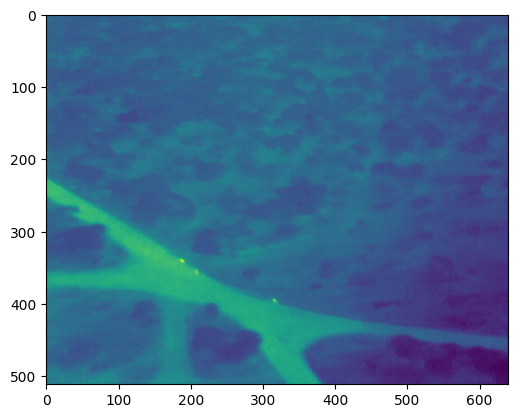

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


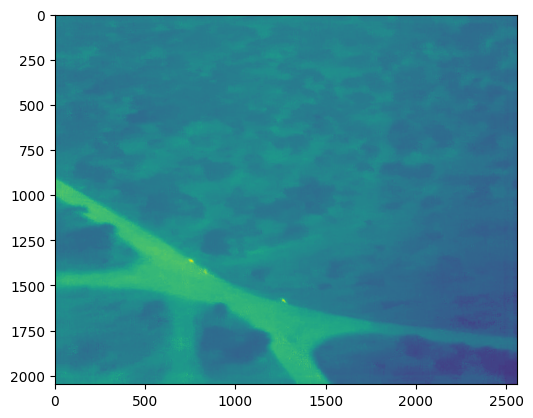

 90%|█████████ | 9/10 [05:18<00:35, 35.75s/it]

Shape of the input image:  torch.Size([1, 512, 640])
Input image: 


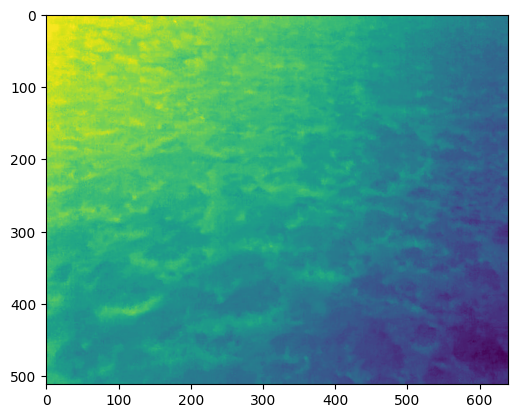

Shape of the Super Resolved image:  torch.Size([1, 1, 2048, 2560])


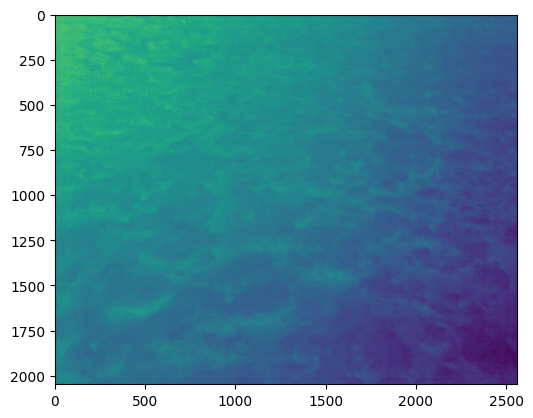

100%|██████████| 10/10 [06:01<00:00, 36.12s/it]


In [21]:
import random
from tqdm.auto import tqdm
import os
gt_img = r"C:\SaiVinay\Dataset\SRIR Data\Train"
img_list = os.listdir(gt_img)
img_path = [os.path.join(gt_img, x) for x in img_list]
for _ in tqdm(range(10)):
    ixd = random.randint(0, len(img_path))
    img_ = img_path[ixd]
    
    save_path = r"C:\SaiVinay\GitHub\ir_srgan_otsr\src_ir_with_edgeloss\val_imgs"

    ir_srgan(img_, save_path, netG)

In [11]:
cv2.imwrite(ing_file_name, sr_img)

True

In [12]:
import numpy as np
sr_img = np.squeeze(sr_img)
plt.imsave(ing_file_name, sr_img, cmap='gray')

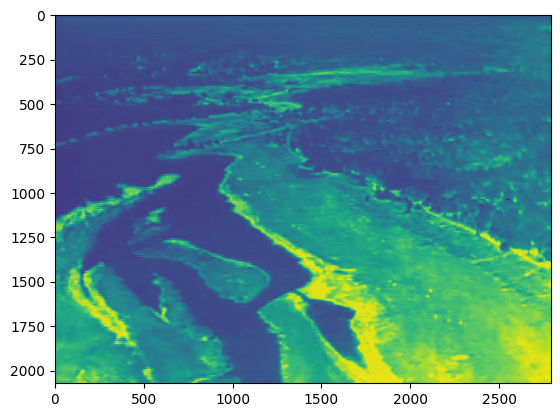

In [8]:
plt.imshow(sr_img)
plt.show()

In [9]:
print("Shape of the Super Resolved image: ",sr_img.shape)

Shape of the Super Resolved image:  (2072, 2792, 1)
